In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.api as sm
import matplotlib.pyplot as  plt
from sklearn.linear_model import LinearRegression

In [2]:
boston_df = pd.read_csv('data/boston.csv')#波士顿房产预测medv
del boston_df['Unnamed: 0']

In [3]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [18]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


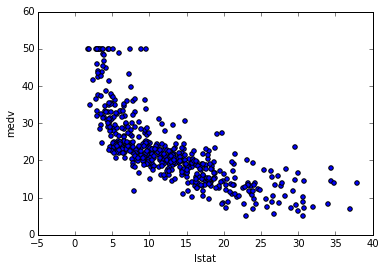

In [73]:
#LSTAT - % of population with low status; MEDV - median value of home
fig,ax = plt.subplots()
ax.scatter(x=boston_df['lstat'],y=boston_df['medv'])
ax.set_xlabel('lstat')
ax.set_ylabel('medv')

In [56]:
X = boston_df['lstat'].values
X = sm.add_constant(X) #增加截距项，矩阵运算
y = boston_df['medv'].values
ols = sm.OLS(y,X).fit()
ols.summary()
#sm模型偏向于统计，总结了参数估计的评估结果Ordinary Least Squares

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 28 Jun 2015   Prob (F-statistic):           5.08e-88
Time:                        16:15:11   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000        33.448    35.659
x1            -0.9500      0.039    -24.528      0.000        -1.026    -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
#sklearn拟合
reg = LinearRegression()
X = boston_df[['lstat']].values#数据格式[[1,2,3],[4,5,6],..[1,2,4]]
y = boston_df['medv'].values#[1,2,3,4]
reg.fit(X,y)
reg.intercept_,reg.coef_

(34.55384087938311, array([-0.95004935]))

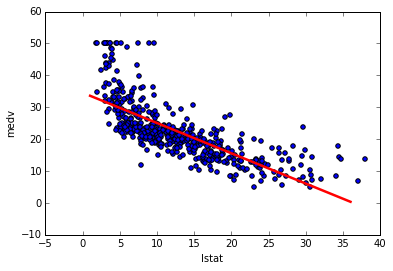

In [78]:
#可视化
fig,ax = plt.subplots()
ax.scatter(x=boston_df['lstat'],y=boston_df['medv'])
ax.set_xlabel('lstat')
ax.set_ylabel('medv')

lstats = boston_df['lstat'].values
xs = range(int(np.min(X[:,0])), int(np.max(X[:,0])))
ys = [reg.predict([x]) for x in xs]
ax.plot(xs,ys,'r',linewidth=2.5)

##多元线性回归

In [12]:
#两个变量的线性回归
X = boston_df[['lstat','age']].values
X = sm.add_constant(X)
y = boston_df['medv'].values
ols2 = sm.OLS(y,X).fit()
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Mon, 29 Jun 2015   Prob (F-statistic):           2.98e-88
Time:                        12:39:50   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.000        31.787    34.659
x1            -1.0321      0.048    -21.416      0.000        -1.127    -0.937
x2             0.0345      0.012      2.826      0.005         0.011     0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#利用所有特征拟合
xcols = boston_df.columns[0:-1]
X = boston_df[xcols]
reg3 = LinearRegression()
reg3.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
reg3.intercept_,reg3.coef_

(36.459488385090104,
 array([ -1.08011358e-01,   4.64204584e-02,   2.05586264e-02,
          2.68673382e+00,  -1.77666112e+01,   3.80986521e+00,
          6.92224640e-04,  -1.47556685e+00,   3.06049479e-01,
         -1.23345939e-02,  -9.52747232e-01,   9.31168327e-03,
         -5.24758378e-01]))

In [10]:
#预测值与预测误差
#残差图：用于识别非线性度，在线性回归模型中，变量之间的关系通常不是线性的
def residuals_vs_fitted(fitted,residuals,x_label='Fitted',y_label='Residuals'):
    plt.subplot(111)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(fitted,residuals)
    polyline = np.poly1d(np.polyfit(fitted,residuals,2))#对残差的平滑拟合，用于显示残差的趋势
    xs = range(int(np.min(fitted)),int(np.max(fitted)))
    plt.plot(xs,polyline(xs),color='r',linewidth=2.5)
def qq_plot(residuals):
    sm.qqplot(residuals)
def standardize(xs):
    xmean = np.mean(xs)
    xstd = np.std(xs)
    return (xs-xmean)/ xstd

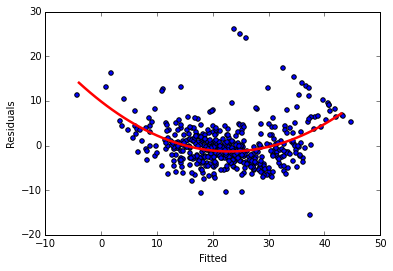

In [29]:
fitted = reg3.predict(X)
residuals = y -fitted
std_residuals = standardize(residuals)

residuals_vs_fitted(fitted,residuals)
#残差图呈现出U型，显示了数据的非线性度

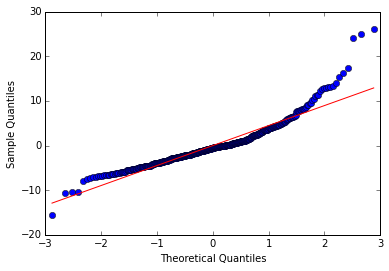

In [31]:
fig = sm.qqplot(residuals,dist='norm',line='r')

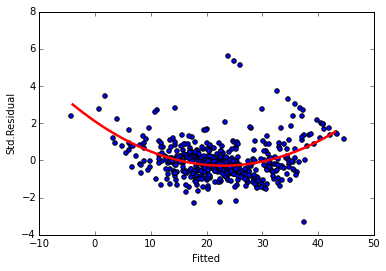

In [32]:
residuals_vs_fitted(fitted,std_residuals,"Fitted","Std.Residual")

##非线性项和协同作用

In [4]:
#拟合 medv~lastat*age
boston_df["lastat*age"] = boston_df["lstat"]*boston_df['age']#新建一列lastat*age
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,lastat*age
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,324.696
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,721.146
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,246.233
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,134.652
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,288.886


In [8]:
reg3 =LinearRegression()
X = boston_df[["lstat","age","lastat*age"]]
y = boston_df["medv"]
reg3.fit(X,y)
(reg3.intercept_,reg3.coef_)

(36.088535934612906,
 array([ -1.39211684e+00,  -7.20859509e-04,   4.15595185e-03]))

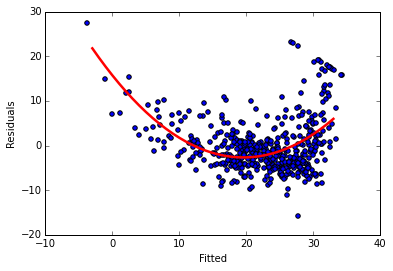

In [11]:
fitted = reg3.predict(X)
residuals = y -fitted
std_residuals = standardize(residuals)
residuals_vs_fitted(fitted,residuals,)

In [16]:
#拟合 medv~lstat +I(lstat^2) 二次项
boston_df['lstat^2'] = boston_df["lstat"]**2
reg4 = LinearRegression()
X = boston_df[["lstat","lstat^2"]]
y = boston_df["medv"]
reg4.fit(X,y)

lstats = boston_df['lstat'].values
xs = range(int(np.min(lstats)),int(np.max(lstats)))
ys6 = [reg4.predict([x,x*x]) for x in xs]
reg4.intercept_,reg4.coef_

(42.862007328169341, array([-2.3328211 ,  0.04354689]))

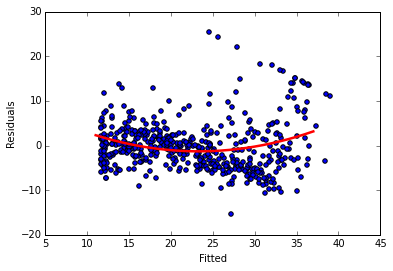

In [17]:
fitted = reg4.predict(X)
residuals = y - fitted
std_residuals = standardize(residuals)
residuals_vs_fitted(fitted,residuals)
#加入了二次项，提高了数据的拟合度
#当残差图显示了数据的非线性联系，简单的办法引入X^2 log X 等非线性项

In [18]:
#拟合4次项 lstat^4
boston_df['lstat^4'] = np.power(boston_df['lstat'],4)
boston_df['lstat^3'] = np.power(boston_df['lstat'],3)

模型:$y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \beta_4 X^4$

In [24]:
X = boston_df[['lstat','lstat^2','lstat^3','lstat^4']]
y = boston_df['medv']
reg5 = LinearRegression()
reg5.fit(X,y)
ys5 = [reg5.predict([x,x**2,x**3,x**4]) for x in xs]
reg5.intercept_,reg5.coef_

(57.30995521851267,
 array([ -7.02846009e+00,   4.95481136e-01,  -1.63101703e-02,
          1.94867775e-04]))

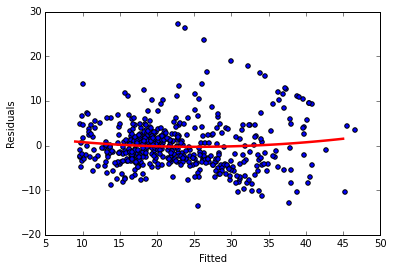

In [26]:
fitted = reg5.predict(X)
residuals = y - fitted
std_residuals = standardize(residuals)
residuals_vs_fitted(fitted,residuals)

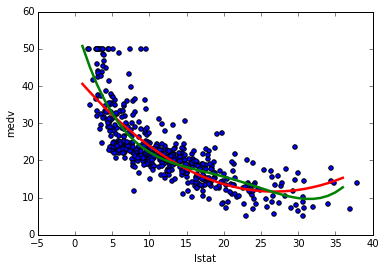

In [32]:
fig,ax = plt.subplots() 
ax.scatter(boston_df['lstat'],boston_df['medv'])
ax.set_xlabel('lstat')
ax.set_ylabel('medv')
ax.plot(xs,ys6,color='r',linewidth=2.5)#二次项的拟合情况 红色
ax.plot(xs,ys5,color='g',linewidth=2.5)#四次项的拟合情况 蓝色